In [31]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

### data cleaning function

In [3]:
def clean_data(df):
    
    #standardize column names
    df = df.drop(columns=['Unnamed: 0'], axis=1)
    df =  df.rename(columns={'EmploymentStatus':'Employment Status'})
    df.columns = [e.lower().replace(' ', '_') for e in df.columns]
    
    #drop duplicates
    df = df.drop_duplicates()
    
    # Nan values
    df = df[df['state'].isna()==False]   # deleted when very few, then response column Nan s are also gone
    df['vehicle_type'] = df['vehicle_type'].fillna('M')
    df['vehicle_class'] = df['vehicle_class'].fillna('Unknown')
    df['vehicle_size'] = df['vehicle_size'].fillna('Unknown')
    df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(0)
    df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df['months_since_last_claim'].mean())
    
    
    return df 

In [4]:
data = clean_data(data)

In [7]:
data['month'] = pd.DatetimeIndex(data['effective_to_date']).month

In [8]:
data[data.month.isin([1,2,3])].sort_index(ascending=True).sample(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
10076,OE75231,Washington,10656.881950,Yes,Extended,Bachelor,2/27/11,Employed,F,72540,...,2,Corporate Auto,Corporate L3,Offer2,Call Center,631.743039,Two-Door Car,Medsize,M,2
4103,EC51047,California,8915.172898,No,Extended,Bachelor,1/23/11,Employed,F,31991,...,2,Personal Auto,Personal L2,Offer2,Agent,548.321886,Four-Door Car,Small,A,1
4822,JV12632,Washington,2858.992036,No,Extended,Master,1/20/11,Unemployed,F,0,...,1,Corporate Auto,Corporate L2,Offer4,Branch,355.385287,Four-Door Car,Medsize,M,1
1677,HI16116,Oregon,5278.647100,No,Basic,Master,1/31/11,Employed,F,29899,...,3,Personal Auto,Personal L3,Offer2,Agent,419.302975,Four-Door Car,Small,M,1
6905,AN36757,Oregon,22056.004960,No,Extended,Master,2/27/11,Employed,M,66851,...,2,Personal Auto,Personal L3,Offer2,Branch,408.550442,Four-Door Car,Medsize,M,2


In [9]:
data['month'].unique()    #so this data already about first 2 months of the year

array([2, 1], dtype=int64)

### Lab 3

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10259 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10259 non-null  object 
 1   state                          10259 non-null  object 
 2   customer_lifetime_value        10259 non-null  float64
 3   response                       10259 non-null  object 
 4   coverage                       10259 non-null  object 
 5   education                      10259 non-null  object 
 6   effective_to_date              10259 non-null  object 
 7   employment_status              10259 non-null  object 
 8   gender                         10259 non-null  object 
 9   income                         10259 non-null  int64  
 10  location_code                  10259 non-null  object 
 11  marital_status                 10259 non-null  object 
 12  monthly_premium_auto           10259 non-null 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
# %matplotlib inline

In [12]:
#set a new numerical column for responses in numeric value
data['response_num'] = data['response'].map(dict(Yes=1, No=0))

In [13]:
#drop unnecessary columns
data = data.drop(columns=['response', 'customer', 'effective_to_date'], axis = 1)

In [15]:
# seperated numerical and categorical 
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(object)
#numerical.columns
#categorical.columns

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

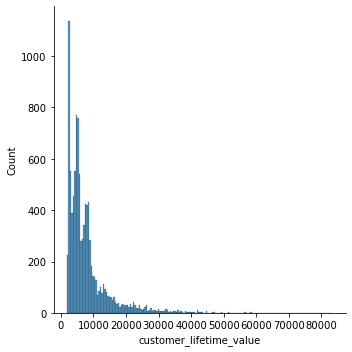

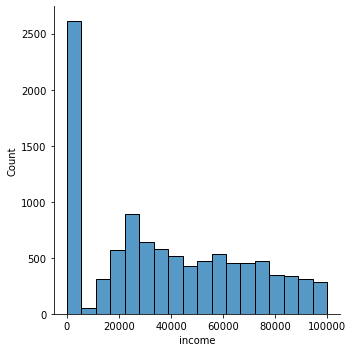

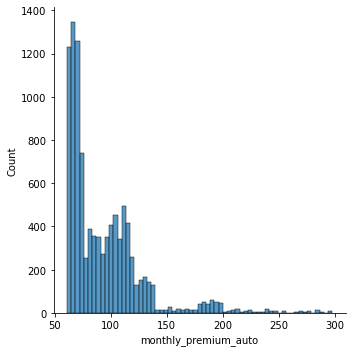

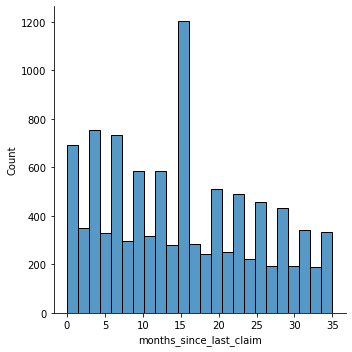

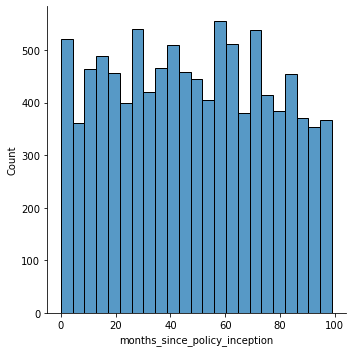

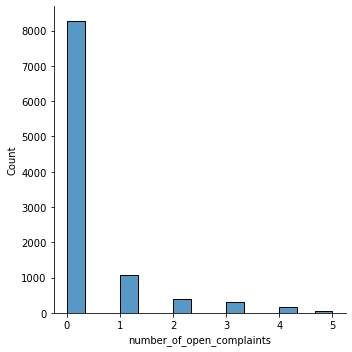

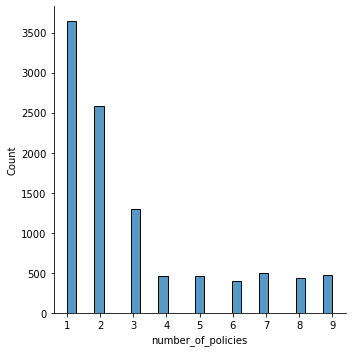

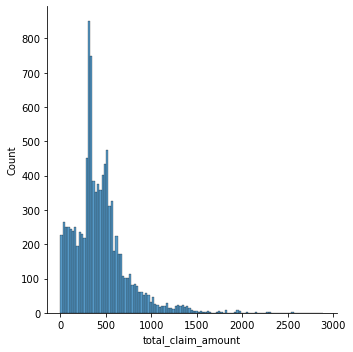

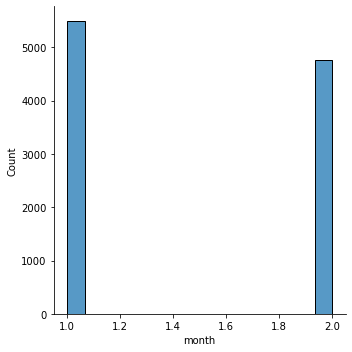

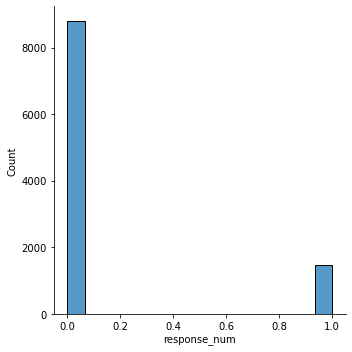

Error in callback <function flush_figures at 0x0000027CCC3FF550> (for post_execute):


KeyboardInterrupt: 

In [17]:
for x in numerical:
    sns.displot(numerical[x])
    plt.show()
sns.pairplot(numerical)

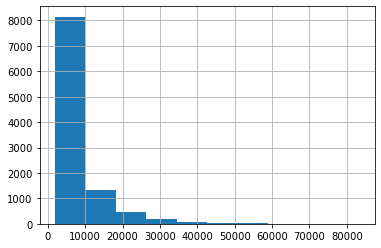

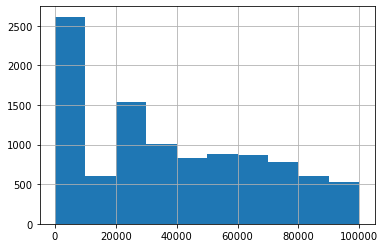

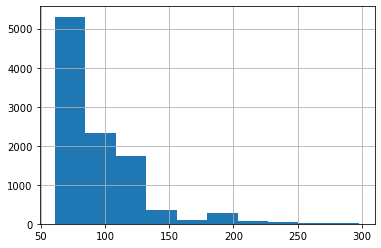

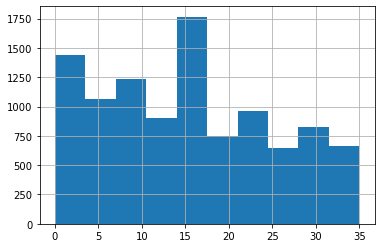

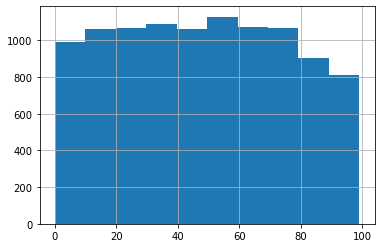

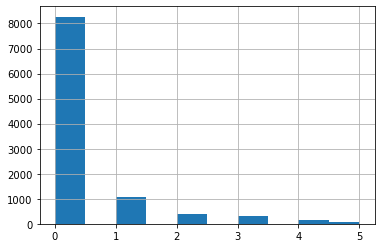

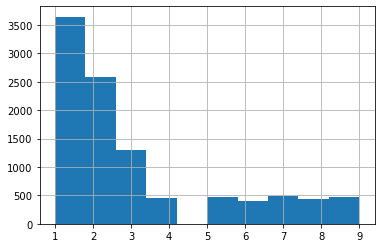

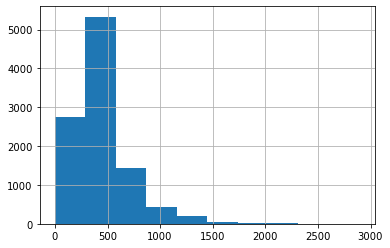

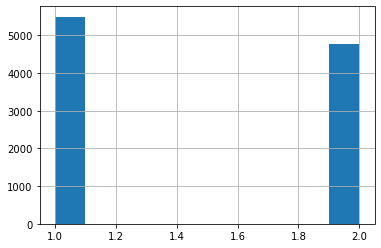

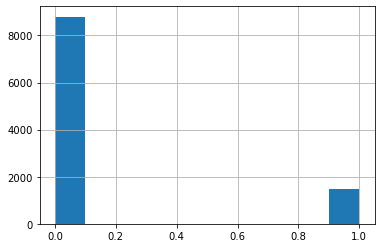

In [19]:
for x in numerical:
    numerical[x].hist()
    plt.show()

In [20]:
# I don"t think they distribute normally

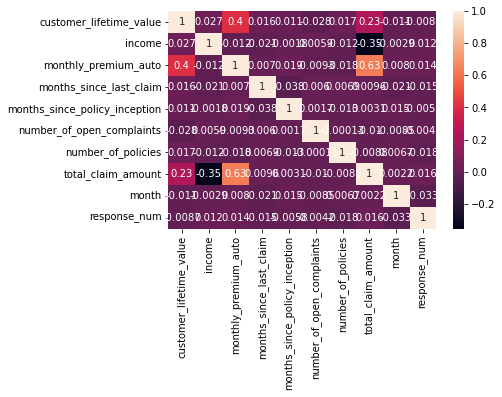

In [21]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#there is no strong correlation between the features, so we keep all

### round 5

In [22]:
# X-y split
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)
X_numerical = X.select_dtypes(include = np.number)
X_categorical= X.select_dtypes(include = object)

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [24]:
# Normalizing data. Scaling using min-max
transformer = MinMaxScaler().fit(X_numerical)
X_normalized = transformer.transform(X_numerical)
print(X_normalized.shape)
X_normalized = pd.DataFrame(X_normalized,columns=X_numerical.columns)
X_normalized.head()

(10259, 9)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_num
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.087527,0.236795,0.236287,0.432191,0.313131,0.0,0.750,0.0,0.0


### round 6

In [25]:
X_cat_cols = X_categorical.columns
display(X_cat_cols)

Index(['state', 'coverage', 'education', 'employment_status', 'gender',
       'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [26]:
# # I am now one hot encode X categorical
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_categorical)
cols = encoder.get_feature_names(input_features=X_categorical.columns)
X_cat_encoded = pd.DataFrame(encoder.transform(X_categorical).toarray(),columns=cols)
X_cat_encoded.head()

C:\Users\aslis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_Unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_Unknown,vehicle_type_M
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
#Concatenate the two dataframes : One hot encoded categorical features and MinMaxScaled numerical features
X = pd.concat([X_normalized, X_cat_encoded], axis=1)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10259.0,0.075268,0.084926,0.0,0.025877,0.047595,0.087130,1.0
income,10259.0,0.375517,0.303546,0.0,0.000000,0.338434,0.621388,1.0
monthly_premium_auto,10259.0,0.136019,0.145330,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,10259.0,0.432191,0.279209,0.0,0.200000,0.428571,0.657143,1.0
months_since_policy_inception,10259.0,0.486194,0.281938,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,10259.0,0.072327,0.177748,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,10259.0,0.246186,0.299195,0.0,0.000000,0.125000,0.375000,1.0
month,10259.0,0.464568,0.498767,0.0,0.000000,0.000000,1.000000,1.0
response_num,10259.0,0.142704,0.349788,0.0,0.000000,0.000000,0.000000,1.0
state_California,10259.0,0.345843,0.475665,0.0,0.000000,0.000000,1.000000,1.0


### train-test split

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### train a model with train set

In [32]:
#we train/fit our model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.768759545972033

In [34]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)
# looks good

0.7785300859985376

In [35]:
#mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

16817.321903398595

In [36]:
# root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

129.68161744595335

In [37]:
#mean absolute error
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

93.90262761860328


## round 7

In [38]:
# try to improve your model

In [39]:
# this time I will use Standard Scaler
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler().fit(X_numerical)
X_standardized = Standardtransformer.transform(X_numerical)
X_standardized = pd.DataFrame(X_standardized,columns=X_numerical.columns)

In [40]:
#Concatenate the two dataframes : One hot encoded categorical features and standard scaled numerical features
X2 = pd.concat([X_standardized, X_cat_encoded], axis=1)

In [41]:
# doing train-test split with the standard scaled X and changed my test size
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9233, 54)
(1026, 54)
(9233,)
(1026,)


In [42]:
#we train/fit our model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
predictions2 = lm.predict(X_train)
r2_score(y_train, predictions2)
#R2 score dropped with less amount of features

0.7704730390937856

In [44]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)
# still looks good

0.7709778174470983

### personal curiosity

In [45]:
# Now I will try something different. I will try the columns which I think related about people's wealth/income
X_wealth = X_standardized[['customer_lifetime_value', 'income', 'monthly_premium_auto']]
# I actually wanted to select columns from X_categorical, for ex : education, vehicle class and concatenate these. 
# Because these might say something about peoples wealth.
# But I don't know if it will make a difference. Maybe I would be over emphasizing money in my analysis.
# Anyway I will ask about that. Living it how it is for now.
X3 = pd.concat([X_wealth, X_cat_encoded], axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8207, 48)
(2052, 48)
(8207,)
(2052,)


In [47]:
# here I made a new linear model because columns are changed
lm2 = linear_model.LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [48]:
predictions = lm2.predict(X_train)
r2_score(y_train, predictions)

0.767688513050611

In [49]:
predictions_test = lm2.predict(X_test)
r2_score(y_test, predictions_test)
# still looks good

0.7782579908172651

## Final round

In [ ]:
# present results
# I tried different models, changes the test size, scaler, and dropped some columns.
# Best one was the first one, also I think very highly correlated with persons income